In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FactorAnalysis
from pykalman import KalmanFilter
from helper_functions import myplot

# PCA on decision making process with other latents in background

In [2]:
np.random.seed(10)
N = 10
D = 2 #3
A = np.array([.99,.2])*np.eye(D)
T = 100
Ttrials = 10
dt = .001
ph = 4
t = np.arange(0,T*dt,dt)
x = np.zeros([T,D,Ttrials])*np.nan
y = np.zeros([T,N,Ttrials])*np.nan
C = np.random.randn(N,D)
Q = .1
####### make latent and observed #######
x[0,:,:] = np.random.randn(D,Ttrials)*np.sqrt(Q)
#plt.figure(figsize=(4,4))
#plt.plot([-10,10], [-10,10],'-k')
for rr in range(Ttrials):
    #c1 = np.random.choice(np.linspace(-4,4,10),1)[0]
    #c2 = np.random.choice(np.linspace(-8,8,10),1)[0]
    #t1 = np.linspace(-4+c1, 4+c1,T)# 
    #t2 = -np.linspace(-8+c2, 8+c2,T) # 
    #plt.plot(t1,t2,'-', label=np.str(c1.round())+' '+np.str(c2.round()))
    #plt.plot(t1[20],t2[20],'ok')
    for tt in range(1,T):
        x[tt,:, rr] = A.dot(x[tt-1,:,rr])+np.random.randn(D)*np.sqrt(Q)
    #x[:,0,rr] += 1/(1+np.exp(-t1)) #+np.random.randn(1)
    #x[:,1,rr] += 1/(1+np.exp(-t2)) #+np.random.randn(1)
    
    #x[:,2,rr] += np.sin(2*np.pi*np.linspace(0,1,T)*1+np.random.choice(np.linspace(0, np.pi, 10),1))#rr/Ttrials*2*np.pi)#
    #x[:,3,rr] += np.sin(2*np.pi*np.linspace(0,1,T)+rr/Ttrials*ph)
    
    y[:,:,rr] = (C.dot(x[:,:,rr].T)+np.random.randn(N,T)*.5).T
#plt.legend()

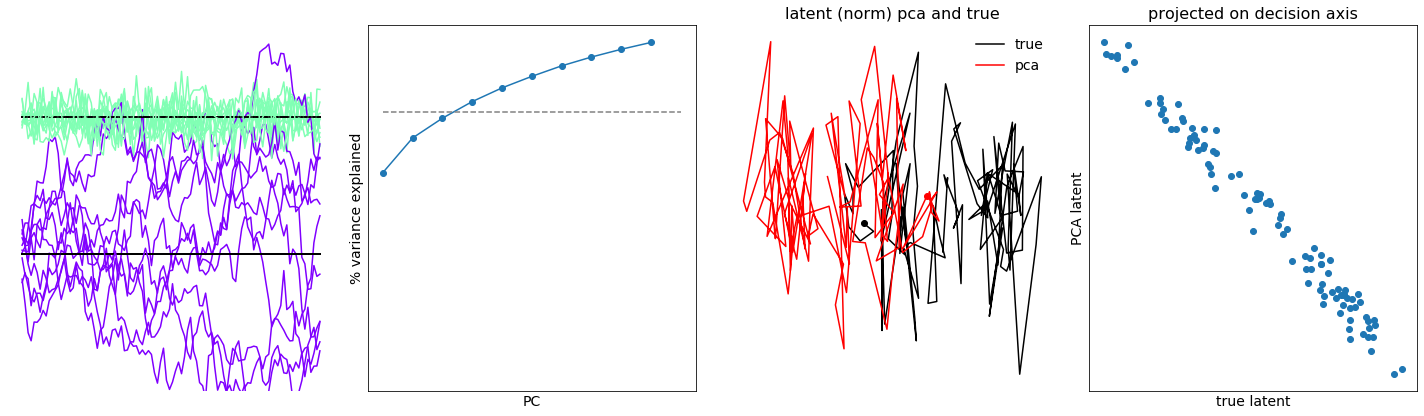

In [3]:
####### visualization #######
fig, ax = myplot(1,4,figsize=(20,6), removeticks=True)
ax[0][0].axis('off')
for rr in range(Ttrials):
    for dd in range(D):
        ax[0][0].plot(t, dd*3+np.zeros(len(t)), '-k')
        ax[0][0].plot(t, dd*3+x[:,dd,rr], color=plt.cm.rainbow(dd/D)) #, label=speed[dd])
ax[0][0].set_xlabel('time')
ax[0][0].set_ylabel('dynamics')
ax[0][0].set_ylim(-3, ax[0][0].get_ylim()[1]);
pca = PCA(n_components=10).fit(np.mean(y,axis=2))
ax[0][1].plot(100*np.cumsum(pca.explained_variance_ratio_), 'o-')
ax[0][1].plot([0,10], [80,80], '--', color='grey')
ax[0][1].set_ylim(0,105)
ax[0][1].set_xlabel('PC')
ax[0][1].set_ylabel('% variance explained')
rr = 0
ax[0][2].plot(x[0,0,rr]/np.max(np.abs(x[:,0,rr])), x[0,1,rr]/np.max(np.abs(x[:,1,rr])), 'ok')
ax[0][2].plot(x[:,0,rr]/np.max(np.abs(x[:,0,rr])), x[:,1,rr]/np.max(np.abs(x[:,1,rr])), 'k', label='true')
ax[0][2].plot((y[0,:,rr].dot(pca.components_[0,:]))/np.max(np.abs((y[:,:,rr].dot(pca.components_[0,:])))), 
              (y[0,:,rr].dot(pca.components_[1,:]))/np.max(np.abs((y[:,:,rr].dot(pca.components_[1,:])))), 'or')
ax[0][2].plot((y[:,:,rr].dot(pca.components_[0,:]))/np.max(np.abs((y[:,:,rr].dot(pca.components_[0,:])))), 
              (y[:,:,rr].dot(pca.components_[1,:]))/np.max(np.abs((y[:,:,rr].dot(pca.components_[1,:])))), 'r',
             label='pca')
ax[0][2].set_title('latent (norm) pca and true')
ax[0][2].legend()
for dd in range(1):
    ax[0][2+dd].set_xlabel('time')
    ax[0][2+dd].set_ylabel('dynamics')
    ax[0][2+dd].legend(frameon=False)
    ax[0][2+dd].axis('off')
####### decision #######
ax[0][3].plot(x[:,0,rr], (y[:,:,rr].dot(pca.components_[0,:].T)), 'o') # .dot([-1,1])
ax[0][3].set_title('projected on decision axis')
ax[0][3].set_xlabel('true latent')
ax[0][3].set_ylabel('PCA latent')

fig.tight_layout()
#plt.savefig('/Users/carolinehaimerl/Google Drive/1 Science/papers/review LSM/'+'dimensionality2.pdf')

### PLDS

In [7]:
%load_ext autoreload
%autoreload 2
from PLDS_Macke2015 import EM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


--- iter 1 ---
    E-step
   compute mu through inference
    x did not converge with BFGS on trial  0 , # iterations:  13
     Desired error not necessarily achieved due to precision loss.
    x did not converge with BFGS on trial  1 , # iterations:  11
     Desired error not necessarily achieved due to precision loss.
    x did not converge with BFGS on trial  2 , # iterations:  11
     Desired error not necessarily achieved due to precision loss.
    x did not converge with BFGS on trial  3 , # iterations:  12
     Desired error not necessarily achieved due to precision loss.
    x did not converge with BFGS on trial  4 , # iterations:  11
     Desired error not necessarily achieved due to precision loss.
    x did not converge with BFGS on trial  6 , # iterations:  13
     Desired error not necessarily achieved due to precision loss.
    x did not converge with BFGS on trial  7 , # iterations:  11
     Desired error not necessarily achieved due to precision loss.
    x did not conv

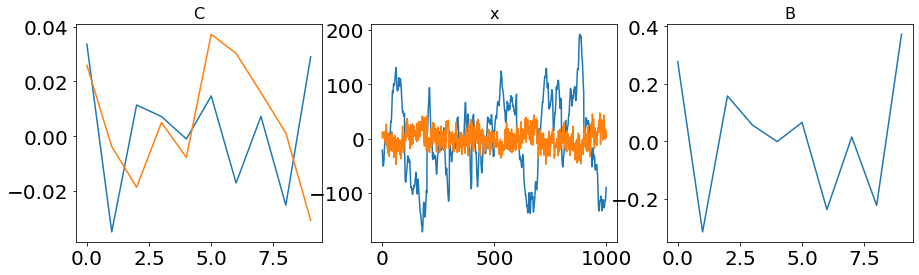

In [8]:
fit = EM(maxiter=100, gtol=1e-08)
Poisson = False
# expect data to be T by ydim by Trials
MOD0 = fit.fit(data=y, xdim=D, poisson=Poisson, seed=0, S=None, 
               maxiterem=3, cscal=.1, sigQ = .1 , a=.1, sigR=.1, upB=True)[0]

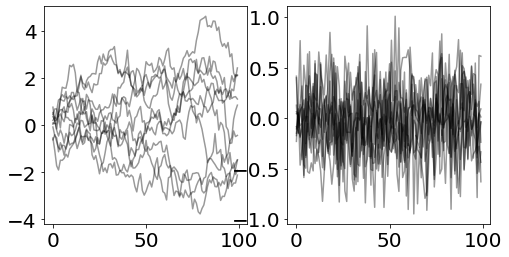

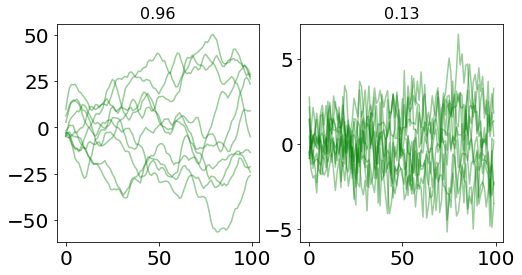

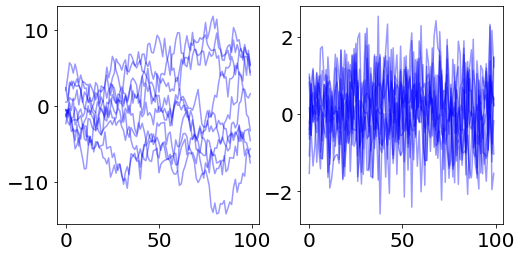

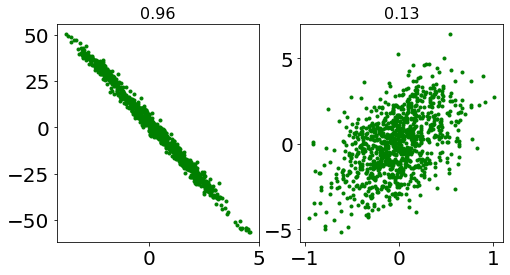

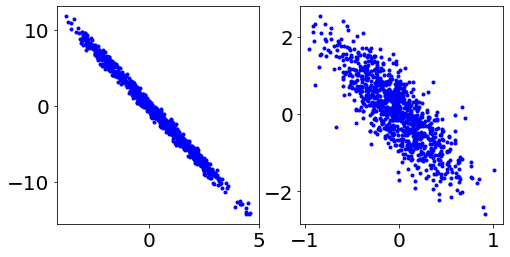

In [9]:
fig, ax = plt.subplots(1,D,figsize=(3*D+2,4))
for kk in range(D):
    #ax[kk].plot(np.mean(x[:,kk,:],axis=1), 'k', linewidth=3)
    for rr in range(Ttrials):
        ax[kk].plot(x[:,kk,rr], 'k', alpha=.4)
        
######### (P)LDS #############
fig, ax = plt.subplots(1,D,figsize=(3*(D)+2,4))
# rotation
U, S, VT = np.linalg.svd(MOD0.A)
for kk in range(D):
    for rr in range(Ttrials):
        xplds = (VT.dot(MOD0.x[:,:,rr].T)).T # MOD0.x[:,:,rr]#
        ax[kk].plot(xplds[:,kk], 'g', alpha=.4)
        ax[kk].set_title(np.round(S[kk],2))
        
########### FA ##############
# first 2 PCs
ymean = np.mean(y,axis=2)
pctmp = ymean.dot(pca.components_[:D,:].T)
fig, ax = plt.subplots(1,D,figsize=(3*D+2,4))
for kk in range(D):
    #ax[kk].plot(ymean.dot(pca.components_[kk,:].T), 'b', linewidth=3)
    for rr in range(Ttrials):
        ax[kk].plot(y[:,:,rr].dot(pca.components_[kk,:].T), 'b', alpha=.4)

fig, ax = plt.subplots(1,D,figsize=(3*D+2,4))
# rotation
for kk in range(D):
    for rr in range(Ttrials):
        xplds = MOD0.x[:,:,rr].dot(U)
        ax[kk].plot(x[:,kk,rr], xplds[:,kk], '.g')
        ax[kk].set_title(np.round(S[kk],2))
        
fig, ax = plt.subplots(1,D,figsize=(3*D+2,4))
# rotation
for kk in range(D):
    for rr in range(Ttrials):
        xpca = y[:,:,rr].dot(pca.components_[kk,:].T)
        ax[kk].plot(x[:,kk,rr], xpca, '.b')

Text(0.5, 1.0, 'true latent process')

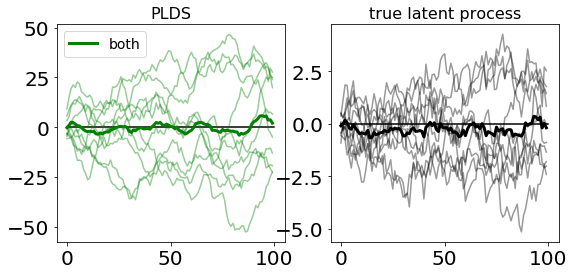

In [10]:
fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].plot([0,T], [0,0], '-k')
ax[1].plot([0,T], [0,0], '-k')
ax[1].plot(np.mean(x[:,:2,:],axis=2).dot([-1,1]), 'k', linewidth=3)
dim = [0,1]
# first 2 PLDS dimensions
ax[0].plot(np.mean(MOD0.x[:,dim,:],axis=2).dot([-1,1]), 'g', linewidth=3, label='both')
for rr in range(Ttrials):
    ax[0].plot(MOD0.x[:,dim,rr].dot([-1,1]), 'g', alpha=.4)
    ax[1].plot(x[:,:2,rr].dot([-1,1]), 'k', alpha=.4)
    
ax[0].legend()
ax[0].set_title('PLDS')
ax[1].set_title('true latent process')

# defining dimensionality

(-2, 2)

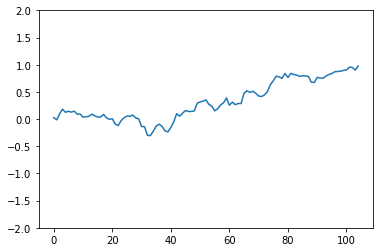

In [2]:

plt.figure()
t = np.linspace(-10,5,105) #np.concatenate((np.linspace(-4,4,35), np.linspace(4,-4,35), np.linspace(-4,2,35)))
m1 = np.random.randn(len(t))*.05
m2 = np.random.randn(len(t))*.05
for tt in range(1,len(t)):
    m1[tt] = m1[tt-1]*.9+np.random.randn(1)*.05
    m2[tt] = m2[tt-1]*.9+np.random.randn(1)*.05
#plt.plot(1/(1+np.exp(-t))*np.repeat([1,-1], [70,35])+m1)
plt.plot(1/(1+np.exp(-t))+m2)
plt.ylim(-2,2)
#plt.savefig('decision.svg')

(-2, 2)

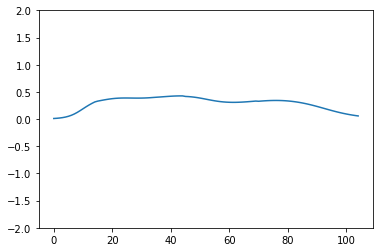

In [3]:
t1 = np.linspace(-5,10,105)
t2 = np.concatenate((np.linspace(-4,4,35), np.linspace(4,-4,35), np.linspace(-4,2,35)))
t3 = np.concatenate((np.linspace(-4,2,15), np.linspace(2,-4,30), np.linspace(-4,2,60)))
t4 = np.linspace(-10,5,105)
t1 = 1/(1+np.exp(-t1))
t2 = 1/(1+np.exp(-t2))*np.repeat([1,-1], [70,35])
t3 = 1/(1+np.exp(-t3))*np.repeat([1,-1], [45,60])
t4 = 1/(1+np.exp(-t4))

plt.figure()

plt.plot(np.mean(np.array([t1,t2,t3,t4]),axis=0))

plt.ylim(-2,2)
#plt.savefig('decision.svg')

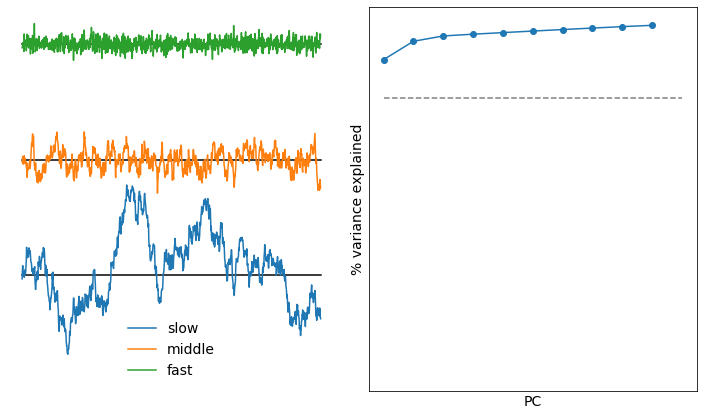

In [86]:
speed = ['slow', 'middle', 'fast']
np.random.seed(1)
D = 3
A = np.array([.99, .9, .001])*np.eye(D)
T = 1000
dt = .001
t = np.arange(0,T*dt,dt)
x = np.zeros([T,D])*np.nan
y = np.zeros([T,10])*np.nan
C = np.random.randn(10,D)
Q = .1
x[0,:] = np.random.randn(D)*np.sqrt(Q)
y[0,:] = C.dot(x[0,:])+np.random.randn(10)*.5
for tt in range(1,T):
    x[tt,:] = A.dot(x[tt-1,:])+np.random.randn(D)*np.sqrt(Q)
    y[tt,:] = C.dot(x[tt,:])+np.random.randn(10)*.5

fig, ax = myplot(1,2,figsize=(10,6), removeticks=True)
ax[0][0].axis('off')
for dd in range(D):
    ax[0][0].plot(t, dd*7+np.zeros(len(t)), '-k')
    ax[0][0].plot(t, dd*7+x[:,dd], label=speed[dd]) #'time scale: %.3f' %(-dt/np.log(A[dd,dd])))
    ax[0][0].set_xlabel('time')
    ax[0][0].set_ylabel('dynamics')
ax[0][0].set_ylim(-7, ax[0][0].get_ylim()[1]);
ax[0][0].legend(frameon=False)
pca = PCA().fit(y)
ax[0][1].set_ylim(0,105)
ax[0][1].plot(100*np.cumsum(pca.explained_variance_ratio_), 'o-')
ax[0][1].plot([0,10], [80,80], '--', color='grey')
ax[0][1].set_ylim(0,105)
ax[0][1].set_xlabel('PC')
ax[0][1].set_ylabel('% variance explained')
fig.tight_layout()
plt.savefig('/Users/carolinehaimerl/Google Drive/1 Science/papers/review LSM/'+'dimensionality1.pdf')

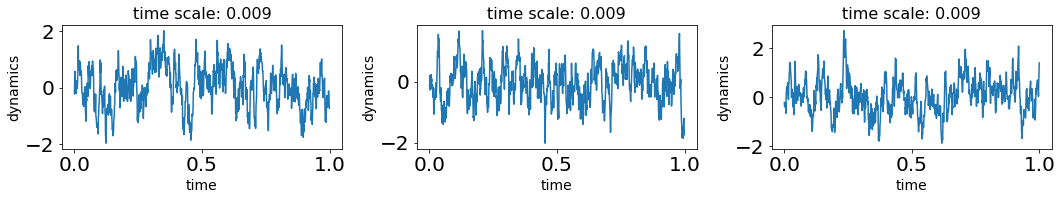

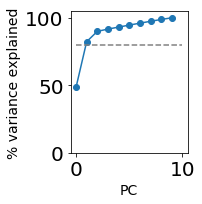

In [75]:
np.random.seed(1)
D = 3
A = np.array([.9, .9, .9])*np.eye(D)
T = 1000
dt = .001
t = np.arange(0,T*dt,dt)
x = np.zeros([T,D])*np.nan
y = np.zeros([T,10])*np.nan
C = np.random.randn(10,D)
Q = .1
x[0,:] = np.random.randn(D)*np.sqrt(Q)
y[0,:] = C.dot(x[0,:])+np.random.randn(10)*.5
for tt in range(1,T):
    x[tt,:] = A.dot(x[tt-1,:])+np.random.randn(D)*np.sqrt(Q)
    y[tt,:] = C.dot(x[tt,:])+np.random.randn(10)*.5
fig, ax = plt.subplots(1,D,figsize=(15,3))
for dd in range(D):
    ax[dd].plot(t, x[:,dd])
    ax[dd].set_title('time scale: %.3f' %(-dt/np.log(A[dd,dd]))) # $\tau=-\frac{1}{\log(A)}$.
    ax[dd].set_xlabel('time')
    ax[dd].set_ylabel('dynamics')
fig.tight_layout()
pca = PCA().fit(y)
plt.figure(figsize=(3,3))
plt.plot(100*np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.plot([0,10], [80,80], '--', color='grey')
plt.ylim(0,105)
plt.xlabel('PC')
plt.ylabel('% variance explained')
plt.tight_layout()
# plt.savefig('/Users/carolinehaimerl/Google Drive/1 Science/papers/review LSM/'+'dimensionality3.pdf')

# look at latents

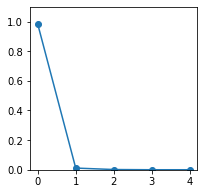

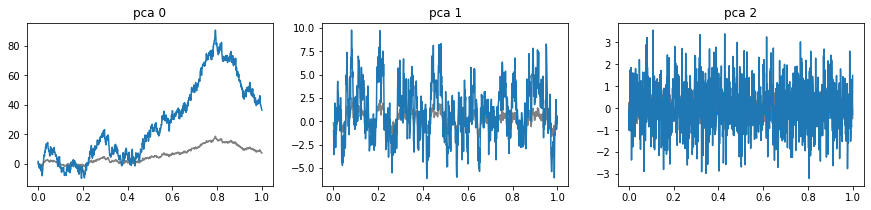

In [27]:

fig, ax = plt.subplots(1,D,figsize=(15,3))
for dd in range(D):
    ax[dd].plot(t, x[:,dd], color='grey')
    ax[dd].plot(t, y.dot(pca.components_[dd,:]))
    ax[dd].set_title('pca '+np.str(dd)) # $\tau=-\frac{1}{\log(A)}$.

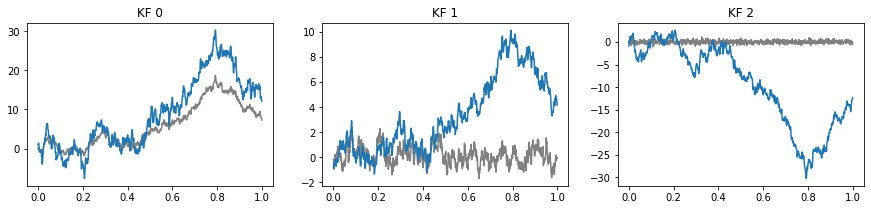

In [30]:
kf = KalmanFilter(n_dim_obs=10, n_dim_state=3)
kf.em(y, em_vars=['transition_covariance', 'transition_matrices', 
                  'observation_covariance', 'observation_matrices',
                     'initial_state_mean', 'initial_state_covariance'])
smoothed_state_means, smoothed_state_covariances = kf.smooth(y)
fig, ax = plt.subplots(1,D,figsize=(15,3))
for dd in range(D):
    ax[dd].plot(t, x[:,dd], color='grey')
    ax[dd].plot(t, smoothed_state_means[:,dd])
    ax[dd].set_title('KF '+np.str(dd)) # $\tau=-\frac{1}{\log(A)}$.